In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NMAX = 500
TSPAN = 3

In [3]:
t = np.linspace(0, TSPAN, NMAX)  # Set of all t from 0 to 3 seconds
dt = TSPAN / (NMAX - 1)          # Time between samples

In [4]:
np.isclose(dt, t[1] - t[0])

True

In [5]:
v0x = 15.0
v0y = 15.0
r = np.zeros([NMAX, 2], float)     # r0 = [0.0, 0.0]
v = np.array([v0x, v0y])           # v0 = [15.0, 15.0]

Our numerical solution can be calculated

In [6]:
a = np.array([0.0, -9.8])                # a = dv/dt => dv = a*dt
for i in range(1, NMAX):
    v += a * dt                          # v[i] = v[i-1] + dv;         v = dr/dt => dr = v*dt
    r[i] = r[i-1] + v * dt               # r[i] = r[i-1] + dr

Our analytical solution is

In [7]:
y = 1/2 * (-9.8) * t**2 + v0y * t

The root mean squared error is

In [8]:
np.sqrt(np.sum((r[:, 1] - y)**2) / NMAX)

0.05104989932482376

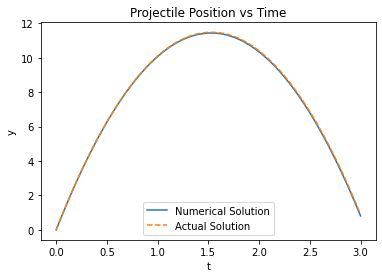

In [9]:
plt.plot(t, r[:, 1], label='Numerical Solution')
plt.plot(t, y, '--', label='Actual Solution')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Projectile Position vs Time')
plt.legend()

Cool, now let's account for linear drag.

In [10]:
r = np.zeros([NMAX, 2], float)              # r0 = [0.0, 0.0]
v = np.array([v0x, v0y])                    # v0 = [15.0, 15.0]
a_g = np.array([0.0, -9.8])
for i in range(1, NMAX):
    a_d = -0.6 * v                          # linear drag
    v += (a_d + a_g) * dt
    r[i] = r[i-1] + v * dt

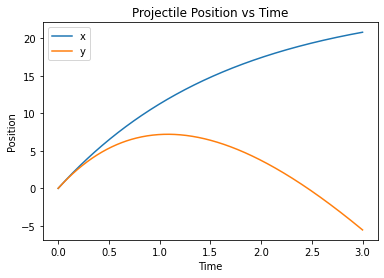

In [11]:
plt.plot(t, r, label=['x', 'y'])
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Projectile Position vs Time')
plt.legend()

Text(0.5, 1.0, 'Projectile Position with Drag')

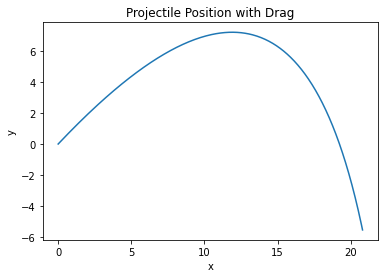

In [12]:
plt.plot(r[:, 0], r[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projectile Position with Drag')

Text(0, 0.5, 'Y-Position')

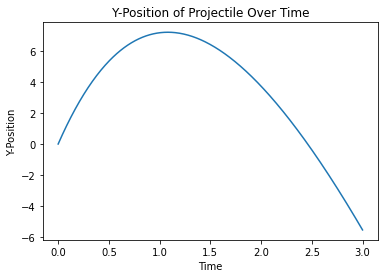

In [13]:
plt.plot(t, r[:, 1])
plt.title('Y-Position of Projectile Over Time')
plt.xlabel('Time')
plt.ylabel('Y-Position')